In [16]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [12]:
X_train_sc = pd.read_csv('X_train_sc.csv')
X_val_sc = pd.read_csv('X_val_sc.csv')
y_train_enc = np.ravel(pd.read_csv('y_train_enc.csv'))
y_val_enc = np.ravel(pd.read_csv('y_val_enc.csv'))

#make train and val customer id frames and drop from data
X_train_id = X_train_sc['customerid']
X_train_sc.drop('customerid',axis=1,inplace=True)
X_val_id = X_val_sc['customerid']
X_val_sc.drop('customerid',axis=1,inplace=True)


In [140]:
def plot_auc(estimator,X_train,y_train,X_val,y_val):
    #fit est
    fprs = []
    tprs = []
    threshs = []
    aucs = []
    
    for est in estimator:
        est = est[1]
        est.fit(X_train,y_train)
        
        #use decision function or not?
        #how to get that info from trees?
        #y_val_pred = est.decision_function(X_val)
        try:
            y_val_pred = est.predict_proba(X_val)
            
            fpr, tpr, thresh = roc_curve(y_val, y_val_pred[:,1])
            auc = roc_auc_score(y_val, y_val_pred[:,1])
            fprs.append(fpr)
            tprs.append(tpr)
            threshs.append(thresh)
            aucs.append(auc)
        except:
            y_val_pred = est.decision_function(X_val)
            fpr, tpr, thresh = roc_curve(y_val, y_val_pred)
            auc = roc_auc_score(y_val, y_val_pred)
            fprs.append(fpr)
            tprs.append(tpr)
            threshs.append(thresh)
            aucs.append(auc)
    
    #plot the val curve
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    for i in range(len(fprs)):
        
        
        ax = plt.plot(fprs[i],tprs[i],label=f'{estimator[i][0]} auc: {round(aucs[i],2)}')
        ax = plt.xlabel('fpr')
        ax = plt.ylabel('tpr')
        ax = plt.legend()
    
    

In [141]:
#load models
first_lr = load('1stlr.joblib')
second_lr = load('2ndlr.joblib')
third_lr = load('3rdlr.joblib')
best_lr = load('best_lr.joblib')
best_lr3 = load('best_lr3.joblib')
best_ridge = load('best_ridge.joblib')
etree = load('etree.joblib')
knn = load('knn.joblisb')
nb = load('nb.joblib')
rfr = load('rfr.joblib')
sgd = load('sgd.joblib')
svc = load('svc.joblib')
tree = load('tree.joblib')
xgb = load('xgb.joblib')
ada = load('ada.joblib')
stack = load('stack.joblib')

In [142]:
estimators = [('first_lr',first_lr),
             ('second_lr',second_lr),
             ('third_lr',third_lr),
             ('best_lr',best_lr),
             ('best_lr3',best_lr3),
             ('best_ridge',best_ridge),
             ('extra tree',etree),
             ('knn',knn),
             ('nb',nb),
             ('rand forest',rfr),
             ('sgd',sgd),
             ('svc',svc),
             ('trees',tree),
             ('xgb',xgb),
             ('adaboost',ada),
             ('stack',stack)]

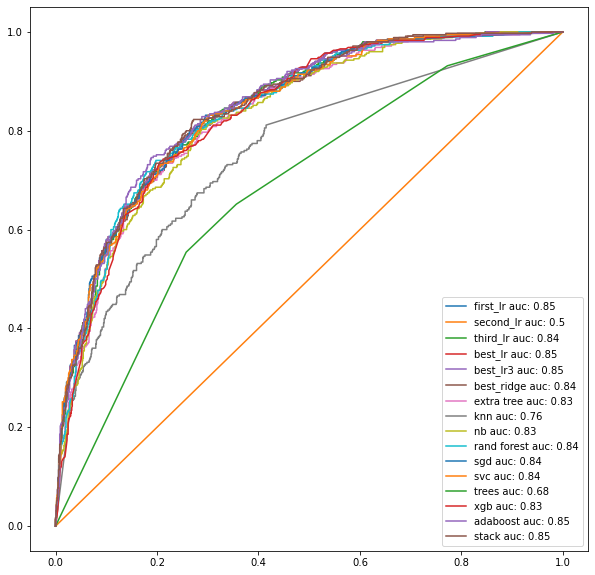

In [143]:
plot_auc(estimators,X_train_sc,y_train_enc,X_val_sc,y_val_enc)